# Importing Libraries

In [1]:
# import system libs
import os
import itertools
from PIL import Image # pillow

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, Flatten, Dense,BatchNormalization,GlobalMaxPooling2D,Conv2D,Dropout,Flatten
from keras import regularizers
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE


2024-07-18 08:48:09.786513: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 08:48:09.786640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 08:48:09.912095: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_path = r"Alzheimer_s Dataset\train"
test_path = r"Alzheimer_s Dataset\test"
batch_s = 32
img_size= (224,224)
mode = "rgb"

# Reading data and graphing number of images in each class

In [3]:
def df_maker(path):
    file_paths = []
    labels = []

    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path,fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path,file)
            file_paths.append(file_path)
            labels.append(fold)


    file_series = pd.Series(file_paths,name="file_paths")
    label_series = pd.Series(labels,name="labels")

    df = pd.concat([file_series,label_series],axis=1)
    return df


In [4]:
train_df = df_maker(train_path)

In [5]:
test_df = df_maker(test_path)

In [6]:
all_data = pd.concat([train_df,test_df])

In [7]:
train_df

,file_paths,labels
0,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
1,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
2,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
3,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
4,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
...,...,...
5116,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
5117,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
5118,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
5119,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented


In [8]:
test_df

,file_paths,labels
0,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
1,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
2,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
3,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
4,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
...,...,...
1274,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1275,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1276,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1277,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented


In [9]:
all_data

,file_paths,labels
0,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
1,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
2,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
3,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
4,/kaggle/input/alzheimers-dataset-4-class-of-im...,ModerateDemented
...,...,...
1274,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1275,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1276,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented
1277,/kaggle/input/alzheimers-dataset-4-class-of-im...,MildDemented


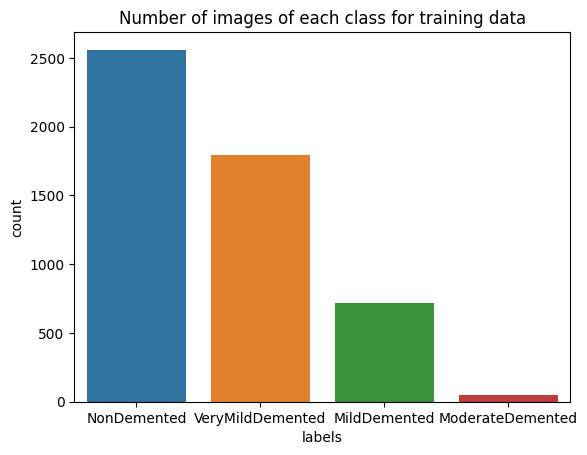

In [10]:
train_count_df = train_df.labels.value_counts().reset_index()
sns.barplot(data=train_count_df,x="labels",y="count")
plt.title("Number of images of each class for training data")
plt.show()

In [11]:
train_count_df

,labels,count
0,NonDemented,2560
1,VeryMildDemented,1792
2,MildDemented,717
3,ModerateDemented,52


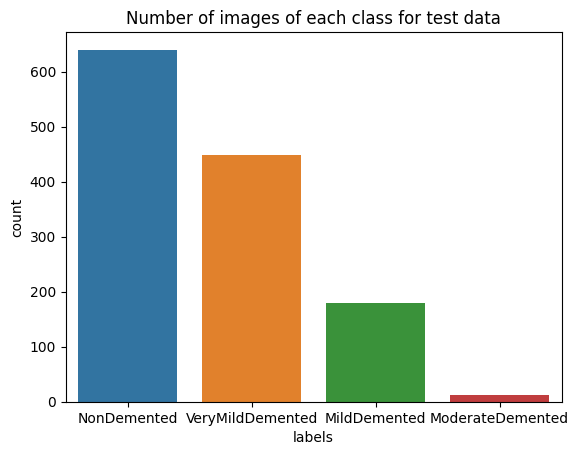

In [12]:
test_count_df = test_df.labels.value_counts().reset_index()
sns.barplot(data=test_count_df,x="labels",y="count")
plt.title("Number of images of each class for test data")
plt.show()

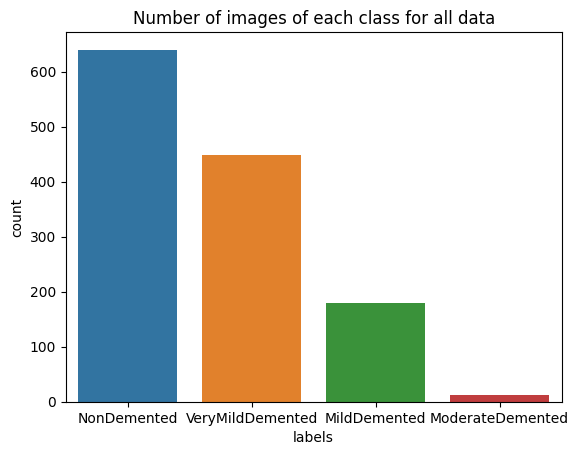

In [13]:
data_count_df = all_data.labels.value_counts().reset_index()
sns.barplot(data=test_count_df,x="labels",y="count")
plt.title("Number of images of each class for all data")
plt.show()

In [14]:
data_count_df

,labels,count
0,NonDemented,3200
1,VeryMildDemented,2240
2,MildDemented,896
3,ModerateDemented,64


#### * data is very imbalanced so we need to upsample

# Reading images and upsampling data using SMOTE

In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [16]:
data_generator = datagen.flow_from_dataframe(
    all_data,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    batch_size=batch_s,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)


Found 6400 validated image filenames belonging to 4 classes.


In [17]:
data_generator.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

## Showing sample images from the data

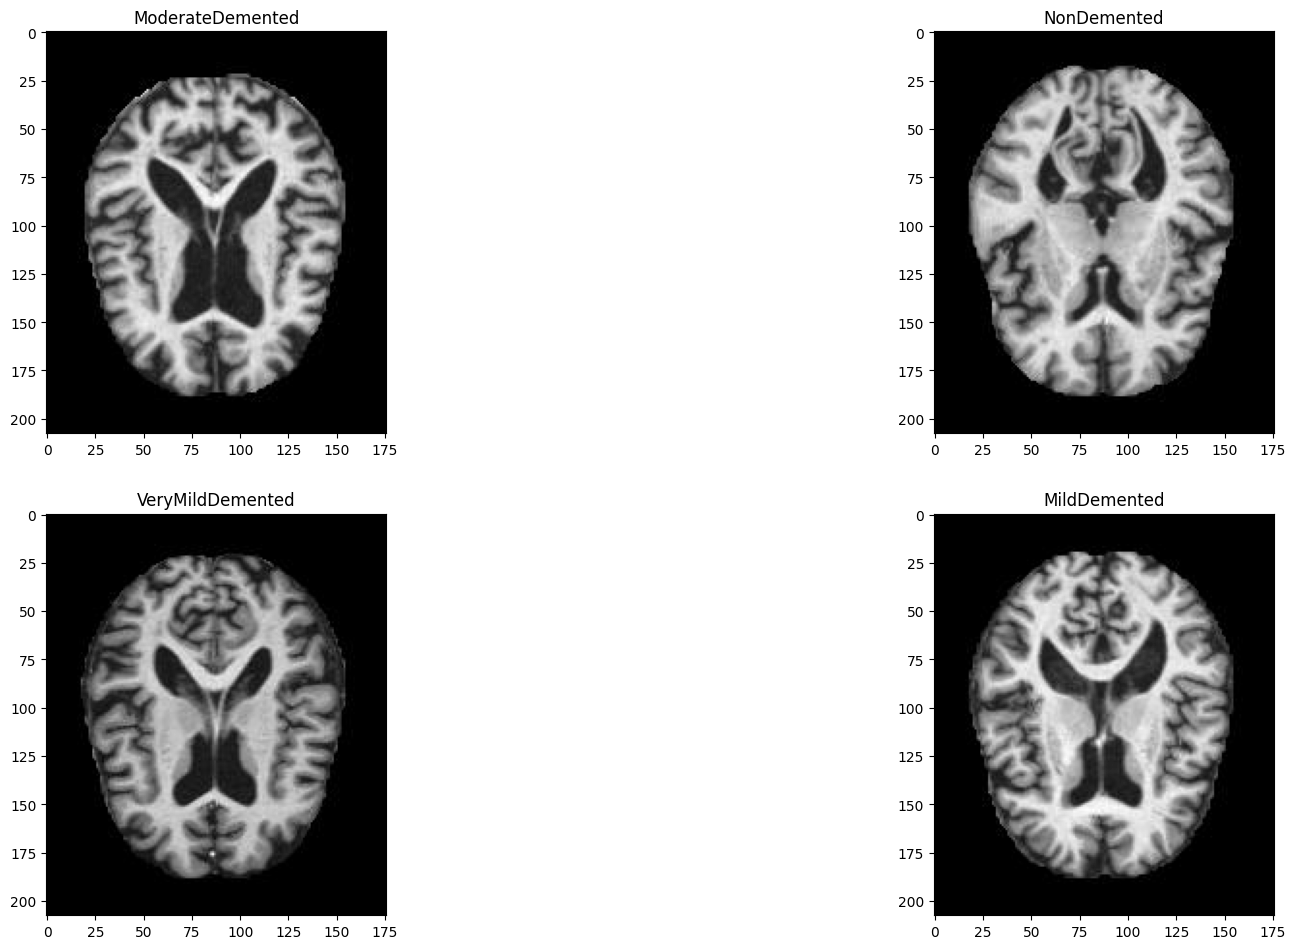

In [18]:
class_dirs = os.listdir(train_path)
plt.figure(figsize=(21, 24))
for i in range(len(class_dirs)):
    plt.subplot(4,2,i+1)
    img_path = f"{train_path}/{class_dirs[i]}/{os.listdir(f'{train_path}/{class_dirs[i]}')[0]}"
    img = plt.imread(img_path)/255
    plt.title(class_dirs[i])
    plt.imshow(img,cmap="gray")

### loading data from generator


In [19]:
data_imgs=np.concatenate([next(data_generator)[0] for i in range(data_generator.__len__())])
data_labels=np.concatenate([next(data_generator)[1] for i in range(data_generator.__len__())])

### Converting our color images to a vector and applying SMOTE method

In [20]:
data_imgs = data_imgs.reshape(-1, 224*224* 3)
data_imgs,data_labels = SMOTE(random_state=7).fit_resample(data_imgs,data_labels)
data_imgs = data_imgs.reshape(-1,224,224,3)

In [21]:
data_generator.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [22]:
map  ={0:'MildDemented',
 1:'ModerateDemented',
 2:'NonDemented',
 3:'VeryMildDemented'}

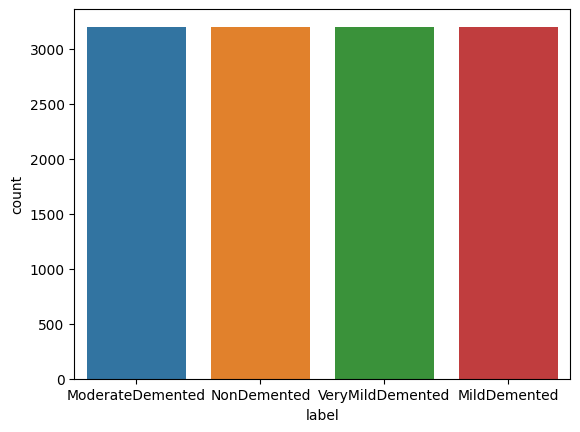

In [23]:
labels=pd.Series([map[i] for i in np.argmax(data_labels,axis=1)],name="label")
labels_count = labels.value_counts().reset_index()
sns.barplot(data=labels_count,x="label",y="count")
plt.show()

In [24]:
labels_count

,label,count
0,ModerateDemented,3200
1,NonDemented,3200
2,VeryMildDemented,3200
3,MildDemented,3200


# Splitting data into train,validation and test data

In [25]:
train_imgs, test_imgs, train_labels,test_labels = train_test_split(data_imgs,data_labels,  train_size= 0.75, shuffle= True, random_state= 7,stratify=data_labels)

In [26]:
test_imgs, val_imgs, test_labels,val_labels = train_test_split(test_imgs,test_labels,  train_size= 0.5, shuffle= True, random_state= 7,stratify= test_labels)

In [27]:
train_imgs.shape

(9600, 224, 224, 3)

In [28]:
val_imgs.shape

(1600, 224, 224, 3)

In [29]:
test_imgs.shape

(1600, 224, 224, 3)

# Creating our model

In [30]:
base_model =tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3),pooling='max')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [31]:
x = base_model.output
x = Dense(256,activation="relu")(x)
x = Dense(256,activation="relu")(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)

model = keras.models.Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable= False


model.compile(loss="categorical_crossentropy", optimizer=Adamax(learning_rate=0.001), metrics=["accuracy","AUC"])

In [32]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,912,836 (56.89 MB)

 Trainable params: 198,148 (774.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Training model and evaluating

In [33]:
history = model.fit(
    train_imgs,train_labels,
    epochs = 25,
    validation_data = [val_imgs,val_labels],
    batch_size=batch_s
)

Epoch 1/25


2024-07-18 08:50:36.078577: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-07-18 08:50:36.078634: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-07-18 08:50:36.078655: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-07-18 08:50:36.078664: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-07-18 08:50:36.078672: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.25159, expected 5.47629
2024-07-18 08:50:36.078680: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.43964, expected 4.66434
2024-07-18 08:50:36.078688: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.54333, expected 5.76803
2024-07-18 08:50:36.078696: E external/local_xla/xla/se

  2/300 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - AUC: 0.6469 - accuracy: 0.3594 - loss: 1.5168   

I0000 00:00:1721292652.494852      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


300/300 ━━━━━━━━━━━━━━━━━━━━ 47s 89ms/step - AUC: 0.7349 - accuracy: 0.4730 - loss: 1.1893 - val_AUC: 0.9198 - val_accuracy: 0.6969 - val_loss: 0.6856
Epoch 2/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - AUC: 0.9117 - accuracy: 0.6786 - loss: 0.6932 - val_AUC: 0.9299 - val_accuracy: 0.7119 - val_loss: 0.6204
Epoch 3/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - AUC: 0.9342 - accuracy: 0.7304 - loss: 0.6012 - val_AUC: 0.9155 - val_accuracy: 0.6519 - val_loss: 0.6686
Epoch 4/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - AUC: 0.9438 - accuracy: 0.7490 - loss: 0.5530 - val_AUC: 0.9582 - val_accuracy: 0.8000 - val_loss: 0.4920
Epoch 5/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - AUC: 0.9587 - accuracy: 0.7911 - loss: 0.4798 - val_AUC: 0.9644 - val_accuracy: 0.8125 - val_loss: 0.4561
Epoch 6/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - AUC: 0.9666 - accuracy: 0.8166 - loss: 0.4373 - val_AUC: 0.9602 - val_accuracy: 0.7931 - val_loss: 0.4645
Epoch 7/25
300/300 ━━━━━━━━━━━━━━━━━━━━

In [34]:
model.evaluate(test_imgs,test_labels)

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - AUC: 0.9959 - accuracy: 0.9497 - loss: 0.1382


[0.13993671536445618, 0.9506250023841858, 0.9955767393112183]

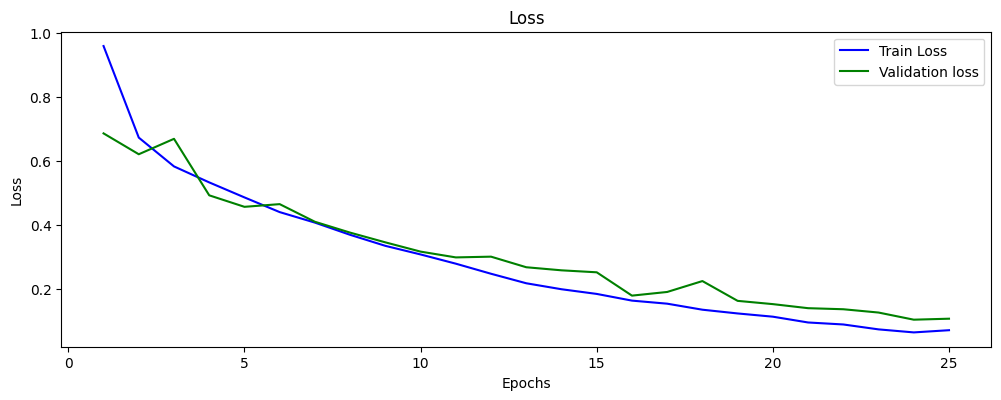

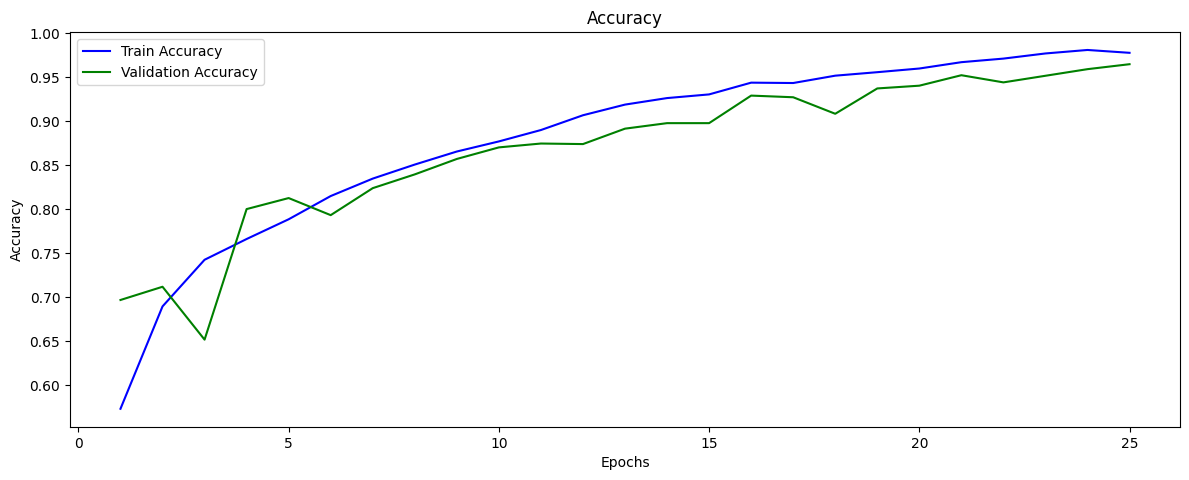

In [35]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(train_acc))]

plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(epochs,train_loss,'b',label="Train Loss")
plt.plot(epochs,val_loss,'g',label="Validation loss")
plt.title("Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,'b',label="Train Accuracy")
plt.plot(epochs,val_acc,'g',label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [36]:
predictions = model.predict(test_imgs) 
y_pred = np.argmax(predictions, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step


In [37]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       400
           1       1.00      1.00      1.00       400
           2       0.96      0.86      0.90       400
           3       0.88      0.95      0.91       400

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



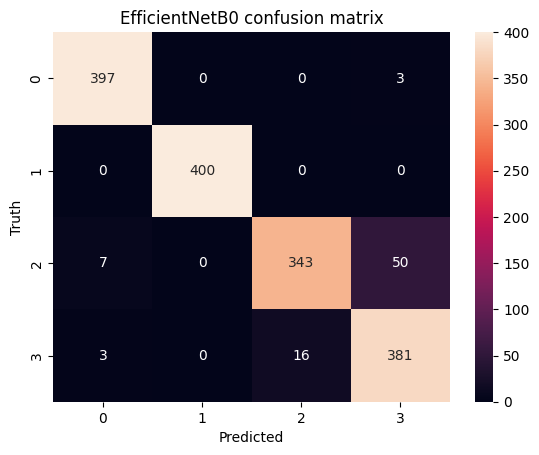

In [38]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("EfficientNetB0 confusion matrix")
plt.show()

In [39]:
model.save("Alzheimer's VGG16 model.keras")